In [60]:
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
OilPrices = pd.read_csv("RCLC1d.csv")
Inflation = pd.read_csv("inflation.csv")

In [34]:
OilPrices.head()

,Date,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)"
0,"Apr 04, 1983",29.44
1,"Apr 05, 1983",29.71
2,"Apr 06, 1983",29.92
3,"Apr 07, 1983",30.17
4,"Apr 08, 1983",30.38


In [35]:
Inflation.head()

,Column7,Column1
0,NaN,NaN
1,10.1,1915
2,10.8,1916
3,103.7,1984
4,107.6,1985


In [36]:
Inflation.columns= ['AVG','year']
OilPrices['Date']= pd.to_datetime(OilPrices['Date'])

In [37]:
OilPrices['year'] = OilPrices["Date"].dt.year
OilPrices2 = OilPrices.groupby('year').sum().reset_index()

In [38]:
OilPrices2.head()

,year,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)"
0,1983.0,5795.33
1,1984.0,7359.51
2,1985.0,6973.73
3,1986.0,3762.29
4,1987.0,4826.90


In [39]:
OilPrices2.columns = ['year','price']
OilPrices2['year']= OilPrices2['year'].astype("int")
OilPrices2['price'] = OilPrices2['price'].astype('float')

In [40]:
Inflation2 = Inflation.drop(0)
Inflation2 = Inflation2.drop(111)


In [41]:
Inflation3 = pd.DataFrame()
Inflation3['year']=Inflation2['year'].astype("int")
Inflation3['price']=Inflation2['AVG']


In [42]:
print(Inflation3[Inflation3['year'].isnull()])

Empty DataFrame
Columns: [year, price]
Index: []


In [43]:
Inflation3 = Inflation3.fillna(0)
Inflation3['price'] = Inflation3['price'].astype('float')

In [ ]:
# Function to calculate correlation
def correlation(x, y):
    shortest = min(x.shape[0], y.shape[0])
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)[0, 1]

# Function to plot time series and show the correlation
def plot_correlation(x, y, text):
    # plot 
    plt.subplots(figsize=(10, 6))
    x.plot(label="x")
    y.plot(label="y")
    plt.title(f"Correlation {text}: {correlation(x, y)}")
    plt.legend(loc="best")
    plt.show()

In [65]:
shifted_versions = [
    (Inflation3['price'].iloc[10:].reset_index(drop=True), OilPrices2['price']),
    (Inflation3['price'], OilPrices2['price'].iloc[20:].reset_index(drop=True)),
]

Best lag: 23
0.45522919333364825


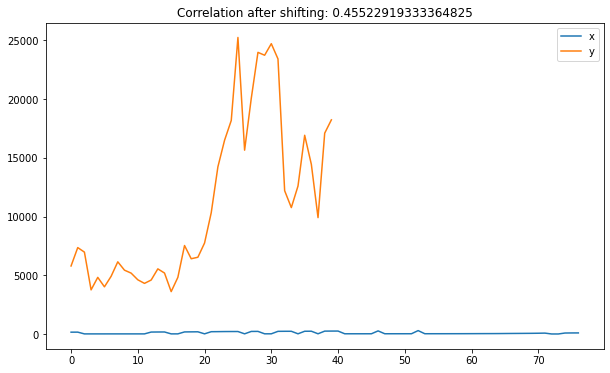

Best lag: 50
0.2897471273118052


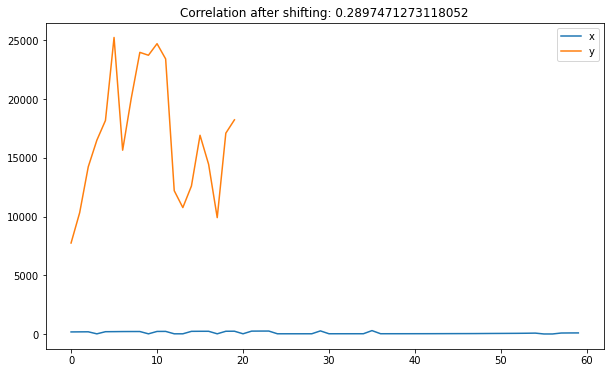

In [70]:
def shift_for_maximum_correlation(x, y):
    correlation = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f"Best lag: {lag}")
    if lag < 0:
        y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        x = x.iloc[lag:].reset_index(drop=True)
    return x, y

# Plot results after shifting
for x, y in shifted_versions:
    shifted_x, shifted_y = shift_for_maximum_correlation(x, y)
    plot_correlation(shifted_x, shifted_y, text="after shifting")
    
    